In [1]:
import pandas as pd
import numpy as np
import warnings
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns 
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
random_state=0

In [2]:
df= pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.9
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2.6
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2.3
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.9
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.9


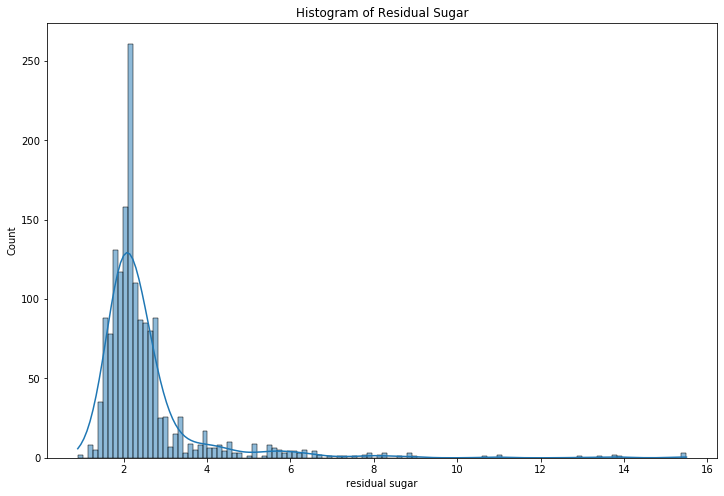

In [3]:
plt.figure(figsize=(12, 8))
sns.histplot(df['residual sugar'], kde=True)
plt.title("Histogram of Residual Sugar")
plt.savefig("histogram_residual_sugar.pdf", bbox_inches="tight")
plt.show()

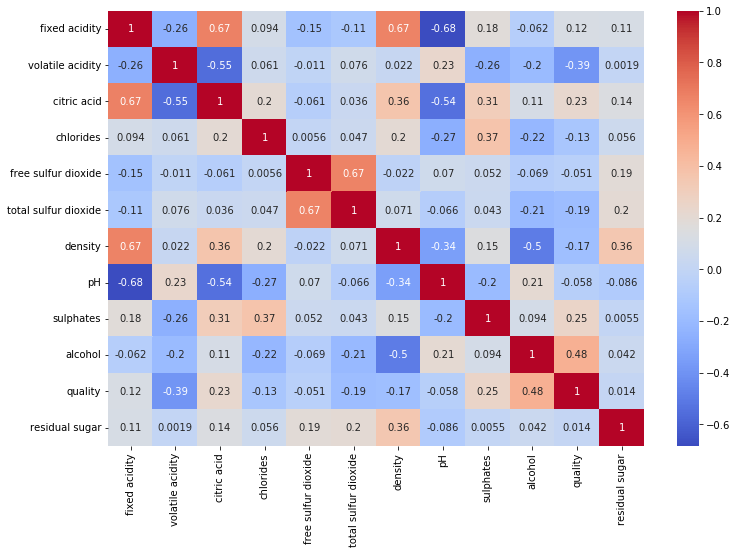

In [4]:
# Compute the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.savefig("heatmapwine.pdf", bbox_inches="tight")
plt.show()


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.9
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2.6
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2.3
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.9
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.9


In [6]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)

# Random Forest
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_rf) * -1)

# Decision Tree
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_dt) * -1)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_knn) * -1)

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_xgb) * -1)

0.6216796875000001
0.82109375
0.71978125
0.679817412868142


In [7]:
X1 = df.iloc[:, :-1] 
y = df.iloc[:, -1] 
def normalize(X1):
    result = X1.copy()
    for feature_name in X1.columns:
        max_value = X1[feature_name].max()
        min_value = X1[feature_name].min()
        result[feature_name] = X1[feature_name] / (max_value - min_value)
    return result

X = normalize(X1)
print(X)

      fixed acidity  volatile acidity  citric acid  chlorides  \
0          0.654867          0.479452         0.00   0.126878   
1          0.690265          0.602740         0.00   0.163606   
2          0.690265          0.520548         0.04   0.153589   
3          0.991150          0.191781         0.56   0.125209   
4          0.654867          0.479452         0.00   0.126878   
...             ...               ...          ...        ...   
1594       0.548673          0.410959         0.08   0.150250   
1595       0.522124          0.376712         0.10   0.103506   
1596       0.557522          0.349315         0.13   0.126878   
1597       0.522124          0.441781         0.12   0.125209   
1598       0.530973          0.212329         0.47   0.111853   

      free sulfur dioxide  total sulfur dioxide    density        pH  \
0                0.154930              0.120141  73.259912  2.763780   
1                0.352113              0.236749  73.186490  2.519685   
2  

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-10-7c3e465a1710>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-10-7c3e465a1710>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val

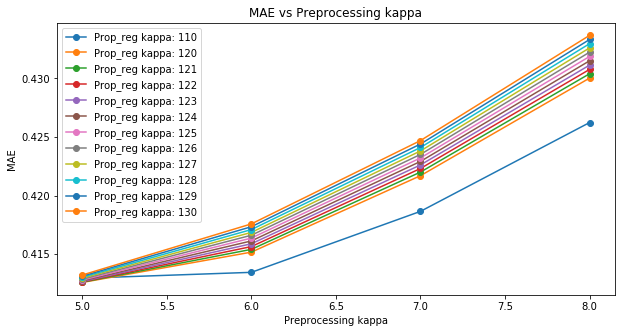

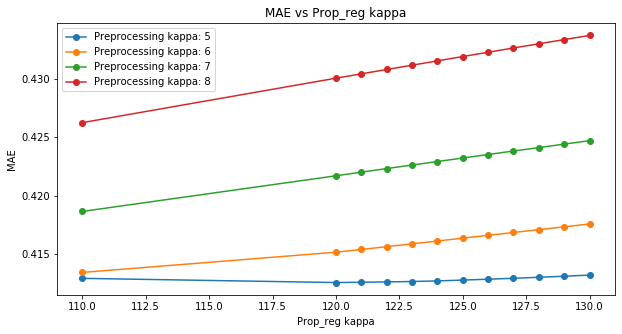

Optimal Preprocessing kappa: 5
Optimal Prop_reg kappa: 120
Minimum MAE: 0.4125740047545827


In [10]:
def preprocess_data(X_train, X_test, y_train, kappa, ordinal_columns):
    X_train, X_test = handle_categorical(X_train, X_test, y_train, ordinal_columns)
    X_train, X_test = handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns)
    return X_train, X_test


def handle_categorical(X_train, X_test, y_train, ordinal_columns):
    means = {}

    for col in X_train.columns:
        if col not in ordinal_columns:  # Categorical variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_train:
                mean = y_train[X_train[col] == val].mean()
                means[(col, val)] = mean
                print(f"Column: {col}, Value: {val}, Mean: {mean}")

            for val in unique_values_test:
                if val not in unique_values_train:
                    print(f"Warning: Value {val} in column {col} of X_test is not in X_train.")

    for col, val in means:
        X_train.loc[X_train[col] == val, col] = means[(col, val)]
        X_test.loc[X_test[col] == val, col] = means[(col, val)]

    return X_train, X_test


def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in X_train.columns:
        if col in ordinal_columns:  # Ordinal variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_test:
                y_train_np = y_train.to_numpy()
                X_train_col_np = X_train[[col]].to_numpy()
                X_test_col_val = val
                l = 0
                v = 0
                for j in range(X_train_col_np.shape[0]):
                    d = abs(X_test_col_val - X_train_col_np[j])
                    l += y_train_np[j] / ((1 + d) ** kappa)
                    v += 1 / ((1 + d) ** kappa)
                imputed_value = l / v
                missing_values[(col, val)] = imputed_value

            for val in unique_values_train:
                if val not in unique_values_test:
                    y_train_np = y_train.to_numpy()
                    X_train_col_np = X_train[[col]].to_numpy()
                    X_train_col_val = val
                    l = 0
                    v = 0
                    for j in range(X_train_col_np.shape[0]):
                        d = abs(X_train_col_val - X_train_col_np[j])
                        l += y_train_np[j] / ((1 + d) ** kappa)
                        v += 1 / ((1 + d) ** kappa)
                    imputed_value = l / v
                    missing_values[(col, val)] = imputed_value

    for col, val in missing_values:
        X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
        X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

    return X_train, X_test



def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)


def kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    results = {}
    mae_values_per_kappa = {}

    for kappa_preprocessing in kappa_values_preprocessing:
        for kappa_prop_reg in kappa_values_prop_reg:
            mae_values = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, kappa_preprocessing, ordinal_columns)
                y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, kappa_prop_reg)
                mae = mean_absolute_error(y_test, y_pred)
                mae_values.append(mae)

            results[(kappa_preprocessing, kappa_prop_reg)] = np.mean(mae_values)
            mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)] = mae_values

    return results, mae_values_per_kappa


ordinal_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol','quality']

kappa_values_preprocessing = [5,6,7,8]
kappa_values_prop_reg = [110,120,121,122,123,124,125,126,127,128,129,130]

cv_results, mae_values_per_kappa = kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg)





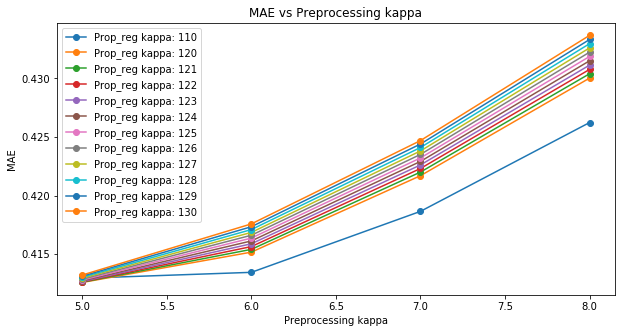

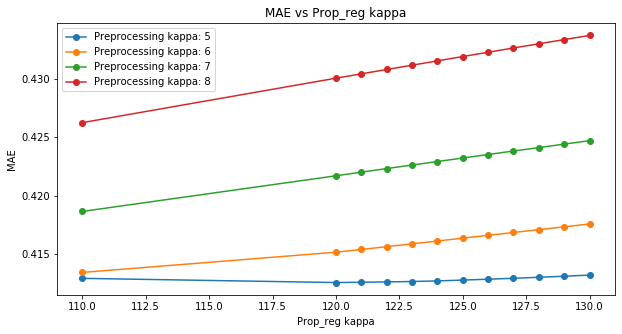

In [11]:
# Plot the MAE vs kappa curve for preprocessing
plt.figure(figsize=(10, 5))
for kappa_prop_reg in kappa_values_prop_reg:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_preprocessing in kappa_values_preprocessing]
    plt.plot(kappa_values_preprocessing, mae_values, '-o', label=f"Prop_reg kappa: {kappa_prop_reg}")

plt.xlabel('Preprocessing kappa')
plt.ylabel('MAE')
plt.title('MAE vs Preprocessing kappa')
plt.legend()
plt.show()

# Plot the MAE vs kappa curve for prop_reg
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"Preprocessing kappa: {kappa_preprocessing}")

plt.xlabel('Prop_reg kappa')
plt.ylabel('MAE')
plt.title('MAE vs Prop_reg kappa')
plt.legend()
plt.show()




In [ ]:
 # Find the optimal combination of kappa values
optimal_kappa_preprocessing, optimal_kappa_prop_reg = min(cv_results, key=cv_results.get)
optimal_mae = cv_results[(optimal_kappa_preprocessing, optimal_kappa_prop_reg)]

print(f"Optimal Preprocessing kappa: {optimal_kappa_preprocessing}")
print(f"Optimal Prop_reg kappa: {optimal_kappa_prop_reg}")
print(f"Minimum MAE: {optimal_mae}")


In [9]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_preprocessing, kappa_prop_reg, mae))
 
# Print all the combinations of kappa values and their corresponding MAE values
print("Prop_reg kappa and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_prop_reg, mae))

    

Kappa combinations and their MAE values:
(5, 60, 0.4609318053722543)
(5, 70, 0.44130228673348804)
(5, 80, 0.4280782026971324)
(5, 90, 0.41995643805332844)
(5, 100, 0.4151220092803845)
(5, 101, 0.41479167192127)
(5, 102, 0.4144827831728318)
(5, 110, 0.4129313003143215)
(5, 120, 0.4125740047545827)
(5, 130, 0.41320948945829883)
(6, 60, 0.4418212763017862)
(6, 70, 0.42695610220426994)
(6, 80, 0.4185928001057329)
(6, 90, 0.41428047789655825)
(6, 100, 0.4130232304308216)
(6, 101, 0.41300259517696264)
(6, 102, 0.4129993844970562)
(6, 110, 0.41343761956432)
(6, 120, 0.4151644626373642)
(6, 130, 0.4175764408242492)
(7, 60, 0.4296629210379663)
(7, 70, 0.4195339698666191)
(7, 80, 0.4151254753563826)
(7, 90, 0.41459831819172666)
(7, 100, 0.4159911625660258)
(7, 101, 0.4162008913363625)
(7, 102, 0.4164188060788055)
(7, 110, 0.41864738915699784)
(7, 120, 0.42169367856229945)
(7, 130, 0.42469366341222575)
(8, 60, 0.4242422900500887)
(8, 70, 0.41820040415063564)
(8, 80, 0.4174902581290748)
(8, 90, 0.